The data set contains hourly power usage of 2-storied house located in Houston, Texas, USA. The data set contains hourly power usage in kwh starting from 01-06-2016 to August 2020. The dataset has marked notes for weekdays, weekends, COVID lockdown & vacation days in notes category column. Power usage during day time is different from night time. The electrical devices that are inside the house are security DVR and POI cameras, 2 x refrigerators, 2 x 50gallon water heater that are on during day time. At night several electrical bulbs, TV's, washing machine, dryer and AC run from evening 6pm to morning 8am. Another data contains historical weather report of Houston, Texas starting from 01-06-2016 to August 2020. Thanks to wonderful weather at Houston, Texas we are blessed with almost 9 months of summer. Starting from Feb month to Nov month and winter is only for two months December and January for most of the years. Objective of this Notebook is to explore features that are critical for forcasting the power usage for a given period. In the process of exploration, we will uncover best possible ways to get to the answer.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline 
matplotlib.rcParams['figure.figsize']=(12,8) 

In [2]:
#reading data
df_usage = pd.read_csv('C:\pythoncode\EDA Python\houston_powerusage\power_usage.csv', parse_dates=['StartDate'], index_col='StartDate')
df_weather = pd.read_csv('C:\pythoncode\EDA Python\houston_powerusage\weather_daily.csv',parse_dates=['Date'], index_col='Date')

In [3]:
df_usage.head()

,Value(kWh),day_of_week,notes
StartDate,,,
2016-01-06 00:00:00,1.057,2,weekday
2016-01-06 01:00:00,1.171,2,weekday
2016-01-06 02:00:00,0.560,2,weekday
2016-01-06 03:00:00,0.828,2,weekday
2016-01-06 04:00:00,0.932,2,weekday


In [4]:
df_usage.tail() #df_usage has hourly data from 1/6/16 to 7/7/2020

,Value(kWh),day_of_week,notes
StartDate,,,
2020-07-07 19:00:00,1.307,1,weekday
2020-07-07 20:00:00,2.872,1,weekday
2020-07-07 21:00:00,2.138,1,weekday
2020-07-07 22:00:00,2.199,1,weekday
2020-07-07 23:00:00,1.809,1,weekday


In [5]:
df_usage.shape 

(35952, 3)

In [6]:
df_weather.head()

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
Date,,,,,,,,,,,,,,,,,,
2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2
2016-02-06,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5
2016-03-06,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6
2016-04-06,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2
2016-05-06,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4


In [7]:
df_weather.tail() #df_weather has daily data from 1/6/16 to 8/30/2020

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
Date,,,,,,,,,,,,,,,,,,
2020-08-26,26,95,83.4,79,79,75.7,73,94,78.2,54,21,12.4,8,29.7,29.7,29.6,0.01,2
2020-08-27,27,99,87.1,78,75,72.0,69,82,62.7,39,14,8.0,0,29.7,29.6,29.5,0.00,3
2020-08-28,28,98,86.5,79,79,77.2,74,94,75.6,49,18,8.1,0,29.8,29.7,29.7,0.00,4
2020-08-29,29,98,87.5,79,79,75.8,72,94,70.4,43,15,6.5,0,29.8,29.7,29.7,0.22,5
2020-08-30,30,97,86.9,78,78,76.3,74,94,72.6,50,14,5.5,0,29.7,29.7,29.6,0.00,6


In [8]:
df_weather.shape 

(1552, 18)

In [9]:
df1 = df_usage['notes']
df1.head()

StartDate
2016-01-06 00:00:00    weekday
2016-01-06 01:00:00    weekday
2016-01-06 02:00:00    weekday
2016-01-06 03:00:00    weekday
2016-01-06 04:00:00    weekday
Name: notes, dtype: object

In [10]:
df2 = df_usage[['Value(kWh)','day_of_week']]
df2.head()

,Value(kWh),day_of_week
StartDate,,
2016-01-06 00:00:00,1.057,2
2016-01-06 01:00:00,1.171,2
2016-01-06 02:00:00,0.560,2
2016-01-06 03:00:00,0.828,2
2016-01-06 04:00:00,0.932,2


In [11]:
df1 = df1.resample('D').asfreq()
df1.head()

StartDate
2016-01-06    weekday
2016-01-07    weekday
2016-01-08    weekday
2016-01-09    weekend
2016-01-10    weekend
Freq: D, Name: notes, dtype: object

In [12]:
df1.shape

(1797,)

In [13]:
df2 = df2.resample('D').sum()
df2.head()

,Value(kWh),day_of_week
StartDate,,
2016-01-06,29.691,48
2016-01-07,43.177,72
2016-01-08,50.057,96
2016-01-09,47.363,120
2016-01-10,42.203,144


In [14]:
df2['day_of_week'] = df2['day_of_week'].apply(lambda x: x/24)
df2.head()

,Value(kWh),day_of_week
StartDate,,
2016-01-06,29.691,2.0
2016-01-07,43.177,3.0
2016-01-08,50.057,4.0
2016-01-09,47.363,5.0
2016-01-10,42.203,6.0


In [15]:
df2.shape

(1797, 2)

In [16]:
df = pd.merge(df2,df1,left_index=True, right_index=True)
df.head()

,Value(kWh),day_of_week,notes
StartDate,,,
2016-01-06,29.691,2.0,weekday
2016-01-07,43.177,3.0,weekday
2016-01-08,50.057,4.0,weekday
2016-01-09,47.363,5.0,weekend
2016-01-10,42.203,6.0,weekend


In [17]:
df.shape

(1797, 3)

In [18]:
#filter the weather data to match with power usage dataframe. 
k = df_weather.shape[0]
df = df[0:k]
df.shape

(1552, 3)

In [19]:
comb_df = pd.merge(df_weather,df,left_index=True, right_index=True)
comb_df.tail()

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,...,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week_x,Value(kWh),day_of_week_y,notes
2020-02-07,2,96,88.0,82,77,74.6,70,85,66.2,43,...,6.0,3,29.9,29.8,29.8,0.00,4,44.567,4.0,weekday
2020-03-07,3,96,84.7,74,76,72.8,67,91,69.6,38,...,6.3,0,29.9,29.9,29.8,0.00,5,39.659,5.0,COVID_lockdown
2020-01-08,1,84,78.3,74,77,72.9,70,94,84.2,65,...,4.0,0,29.9,29.8,29.8,0.06,2,0.000,0.0,NaN
2020-02-08,2,93,82.2,72,74,71.5,68,97,72.5,44,...,3.1,0,29.9,29.8,29.8,0.24,5,0.000,0.0,NaN
2020-03-08,3,97,85.2,73,76,71.6,68,93,66.9,39,...,4.6,0,29.9,29.9,29.8,0.00,6,0.000,0.0,NaN


In [20]:
comb_df.isnull().sum()

Day              0
Temp_max         0
Temp_avg         0
Temp_min         0
Dew_max          0
Dew_avg          0
Dew_min          0
Hum_max          0
Hum_avg          0
Hum_min          0
Wind_max         0
Wind_avg         0
Wind_min         0
Press_max        0
Press_avg        0
Press_min        0
Precipit         0
day_of_week_x    0
Value(kWh)       0
day_of_week_y    0
notes            3
dtype: int64

In [21]:
comb_df = comb_df.fillna(method="ffill") 

In [22]:
comb_df.drop(columns= ['Temp_avg', 'Temp_min','Dew_avg',
       'Dew_min', 'Hum_avg', 'Hum_min', 'Wind_avg',
       'Wind_min','Press_avg', 'Press_min', 'Precipit','day_of_week_x', 'day_of_week_y'], inplace=True)

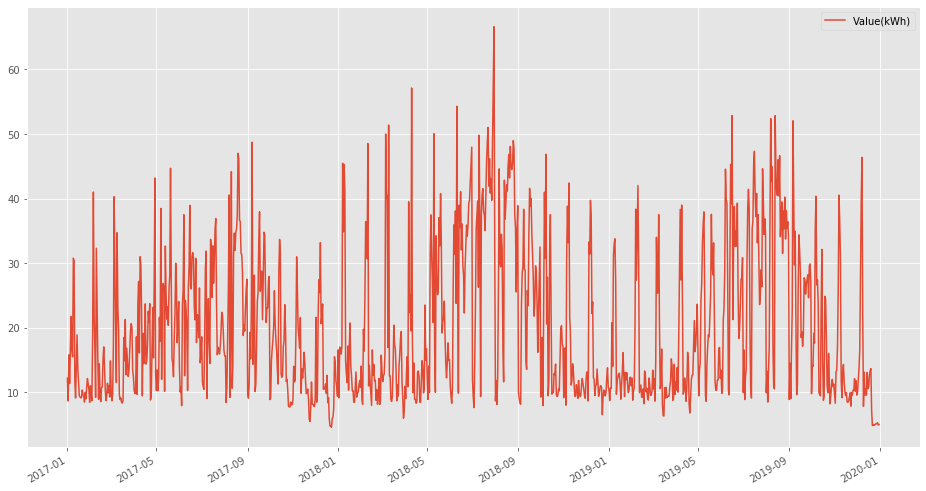

In [140]:
comb_df['Value(kWh)'].loc['2017-01-01':'2019-12-31'].plot(figsize= (16,9), legend= True)

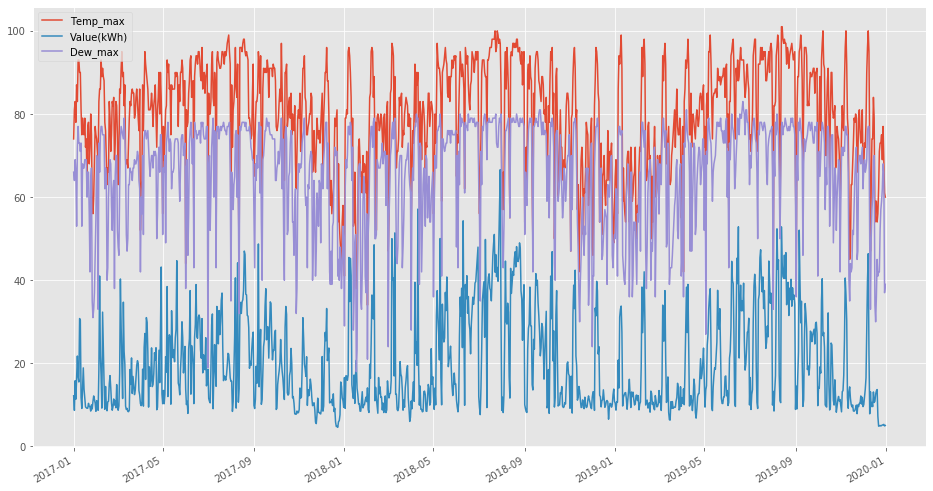

In [141]:
comb_df[['Temp_max','Value(kWh)', 'Dew_max' ]].loc['2017-01-01':'2019-12-31'].plot(figsize= (16,9))

In [142]:
df_short = comb_df.loc['2017-01-01':'2019-12-31']

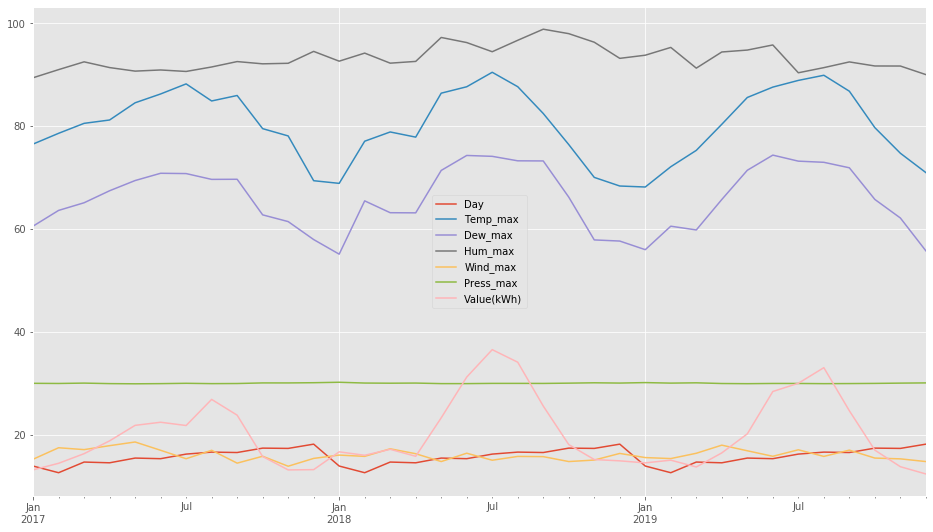

In [143]:
df_short.resample(rule= 'M').mean().plot(figsize= (16,9))

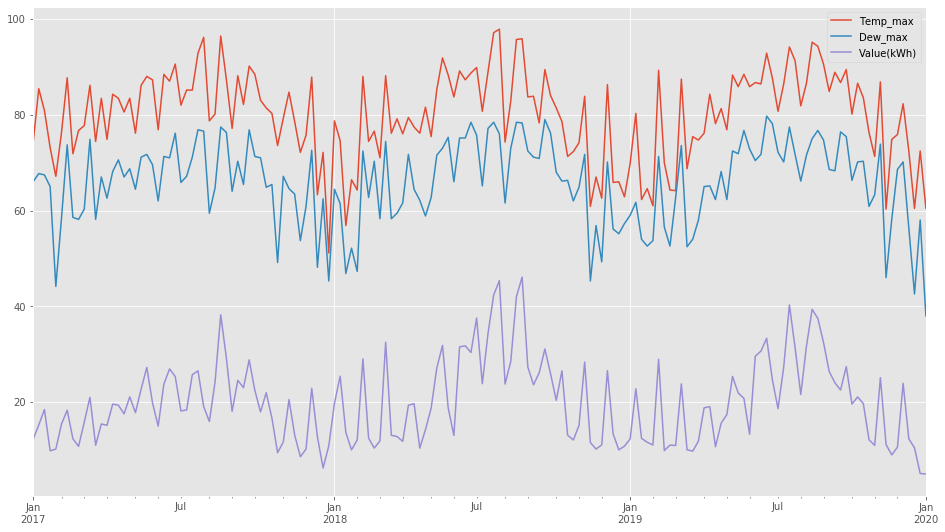

In [144]:
df_short = df_short[['Temp_max', 'Dew_max', 'Value(kWh)','notes']]

df_short.resample(rule= 'W').mean().plot(figsize= (16,9))

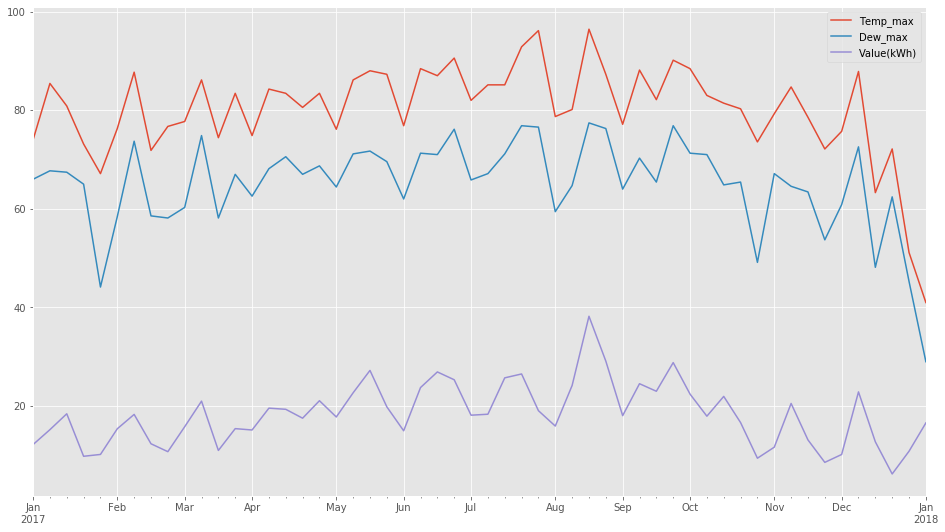

In [145]:
df_short.loc['2017-01-01': '2018-01-01'].resample(rule= 'W').mean().plot(figsize= (16,9), legend=True)

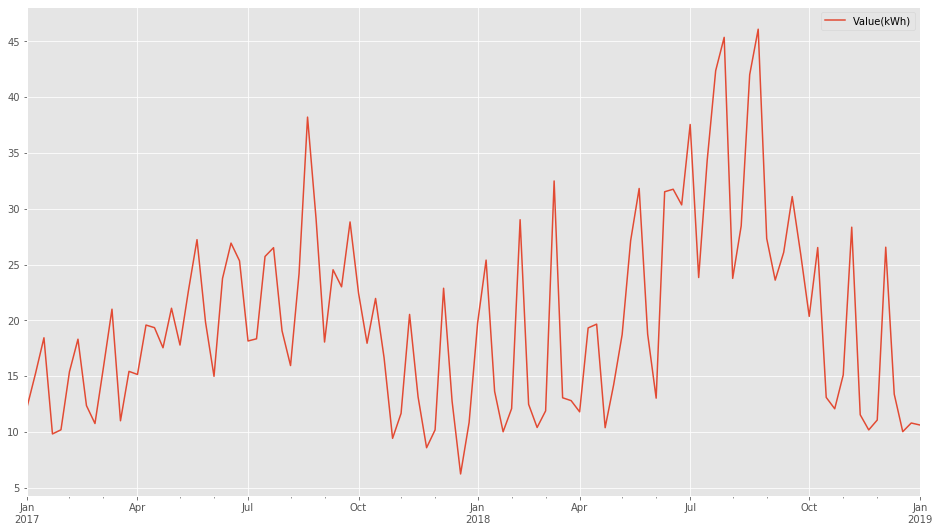

In [146]:
df_short['Value(kWh)'].loc['2017-01-01': '2019-01-01'].resample(rule= 'W').mean().plot(figsize= (16,9), legend=True)

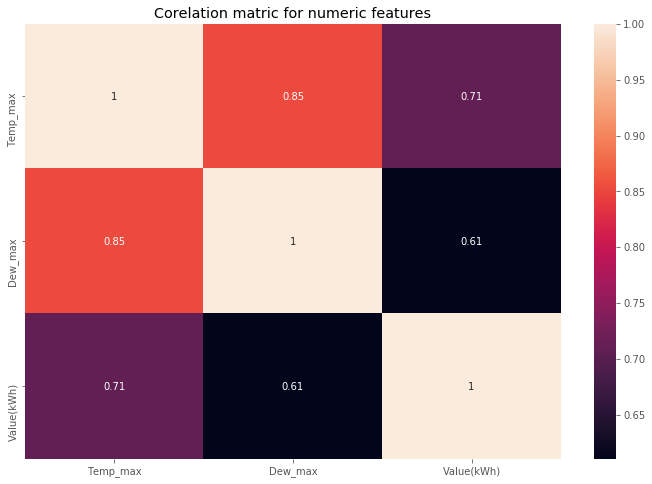

In [147]:
#Relationship Test
corelation_metrix = df_short.corr() # bydefault(method ='pearson')
sns.heatmap(corelation_metrix, annot=True)
plt.title('Corelation matric for numeric features')

plt.show()